In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('../dataset/movies_spacy.csv')
df.dropna(subset=['writers', 'genre', 'directors', 'production_region', 'year', 'runtimeMinutes', 'averageRating'], inplace=True)
df.drop('endYear', axis=1, inplace=True)

In [3]:
from pathlib import Path
import numpy as np

def read_embeddings(embedding_file: str):
    data = Path(embedding_file).read_text()
    lines = data.split('\n')
    filenames = []
    embeddings = []
    for line in lines:
        line_data = line.split(' ')
        if len(line_data) >= 2:
            filenames.append(line_data[0])
            embeddings.append(list(map(float, line_data[1:])))
    return np.asarray(filenames), np.asarray(embeddings)

In [4]:
mean_filenames, embeddings_mean = read_embeddings('../dataset/embeddings_mean.txt')
max_filenames, embeddings_max = read_embeddings('../dataset/embeddings_max.txt')
min_filenames, embeddings_min = read_embeddings('../dataset/embeddings_min.txt')

bert_mean_filenames, bert_mean = read_embeddings('../dataset/embeddings_bert_mean.txt')
bert_max_filenames, bert_max = read_embeddings('../dataset/embeddings_bert_max.txt')
bert_min_filenames, bert_min = read_embeddings('../dataset/embeddings_bert_min.txt')

bert_headtail_filenames, bert_headtail = read_embeddings('../dataset/embeddings_bert_headtail.txt')

In [5]:
bert_headtail[bert_headtail.shape == (0,)] = np.zeros((768,))

In [6]:
df = df[df['filename'].isin(mean_filenames)].copy()

In [7]:
mean_embeddings = []
max_embeddings = []
min_embeddings = []

mean_bert = []
max_bert = []
min_bert = []
ht_bert = []
for index, row in df.iterrows():
    mean_embeddings.append(embeddings_mean[np.where(mean_filenames == row.filename)].ravel())
    max_embeddings.append(embeddings_max[np.where(max_filenames == row.filename)].ravel())
    min_embeddings.append(embeddings_min[np.where(min_filenames == row.filename)].ravel())
    
    mean_bert.append((bert_mean[np.where(bert_mean_filenames == row.filename)].ravel()))
    max_bert.append((bert_max[np.where(bert_max_filenames == row.filename)].ravel()))
    min_bert.append((bert_min[np.where(bert_min_filenames == row.filename)].ravel()))
    
    ht_bert.append((bert_headtail[np.where(bert_headtail_filenames == row.filename)].ravel()))
    
df['fasttext_mean'] = mean_embeddings
df['fasttext_max'] = max_embeddings
df['fasttext_min'] = min_embeddings

df['bert_mean'] = mean_bert
df['bert_max'] = max_bert
df['bert_min'] = min_bert

mean_embeddings = np.asarray(mean_embeddings)
max_embeddings = np.asarray(max_embeddings)
min_embeddings = np.asarray(min_embeddings)

mean_bert = np.asarray(mean_bert)
max_bert = np.asarray(max_bert)
min_bert = np.asarray(min_bert)

ht_bert = np.asarray(ht_bert)


del embeddings_mean, embeddings_max, embeddings_min, bert_mean, bert_max, bert_min, bert_headtail

In [8]:
df = df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.1.1', 'Unnamed: 0.1.1.1', 'Unnamed: 0.1.1.1.1.1', 'Unnamed: 0.1.1.1.1'])

In [9]:
df.head()

,filename,text,IMDB_ID,genre,year,production_region,corpus,duration,directors,writers,...,dep,shape,ent_text,ent_label,fasttext_mean,fasttext_max,fasttext_min,bert_mean,bert_max,bert_min
0,6416324.xml,Der Roman von Alexandre Dumas dem Älteren hatt...,tt1104767,"Adventure,Drama,History",1943.0,French,untokenisiert,90.0,"nm0894509,nm0148602","nm0241416,nm0816458,nm0763376,nm0812731",...,nk sb pg pnc nk nk ag ROOT nk oa punct sb ROOT...,Xxx Xxxxx xxx Xxxxx Xxxxx xxx Xxxxx xxxx xxxx ...,Alexandre Dumas dem Älteren|Originals|Marseill...,PER|LOC|LOC|PER|PER|LOC|PER|PER|LOC|LOC|MISC|L...,"[-0.09066946, 0.13505703, -0.19079152, -0.2511...","[0.57557, 1.1748, 0.95894, 0.74723, 0.96204, 1...","[-0.87907, -0.52082, -1.0979, -1.4864, -0.5775...","[0.027110102, 0.33947977, 0.08643414, -0.19763...","[-1.2702287, -1.2401057, -1.4339375, -1.830932...","[-1.2702287, -1.2401057, -1.4339375, -1.830932..."
1,4732286.xml,Hände hoch oder ich schieße ( 1966 ) dTV - MDR...,tt1631717,Comedy,1966.0,German,untokenisiert,75.0,nm0440757,"nm0440757,nm0833141,nm1127102",...,ROOT pd cd sb cj punct mo punct oa punct cj RO...,Xxxxx xxxx xxxx xxx xxxx ( dddd ) xXX - XXX - ...,dTV|MDR|Wolkenheim|Prinzip|Wolkenheim|Aufregen...,MISC|ORG|LOC|MISC|LOC|PER|PER|LOC|LOC|LOC|LOC|...,"[-0.08849932, 0.13341562, -0.16020295, -0.2384...","[0.57557, 1.011, 0.53746, 0.57593, 0.96204, 1....","[-0.87448, -0.52082, -0.98753, -1.327, -0.7311...","[0.018920409, 0.42203748, 0.20174323, -0.13611...","[-1.3815142, -1.267731, -1.7050809, -2.0170922...","[-1.3815142, -1.267731, -1.7050809, -2.0170922..."
2,6122081.xml,"Hallo , Manuela ? Störe ich ? Kann ich zu dir ...",tt1271979,Drama,1967.0,French,untokenisiert,78.0,nm0816215,nm0816215,...,ROOT punct cj punct ROOT sb punct ROOT sb mo n...,"Xxxxx , Xxxxx ? Xxxxx xxx ? Xxxx xxx xx xxx xx...",Nein|Hause|Juden|Juden|Nett|Heisser|du magst|O...,PER|PER|MISC|MISC|LOC|LOC|PER|MISC|PER|PER|LOC...,"[-0.07498731, 0.13234918, -0.14840715, -0.2293...","[0.606, 1.0807, 0.67317, 0.43597, 0.9357, 0.89...","[-1.017, -0.52082, -0.91285, -1.2295, -0.44328...","[-0.0024721911, 0.43688282, 0.12455284, -0.148...","[-1.173458, -1.0477993, -1.2207671, -1.4115682...","[-1.173458, -1.0477993, -1.2207671, -1.4115682..."
4,5618549.xml,"Na los , iss jetzt schnell auf . Junge , ist d...",tt1065116,Action,1979.0,Japanese,untokenisiert,96.0,nm0814232,"nm0032816,nm0793999,nm0814232",...,ROOT svp punct pd mo mo svp punct sb punct ROO...,"Xx xxx , xxx xxxx xxxx xxx . Xxxxx , xxx xxx x...",Na los|iss|Maki|Maki|Maki !|Chaos|Maki|Maki|He...,LOC|MISC|MISC|PER|ORG|ORG|PER|PER|PER|PER|PER|...,"[-0.07911543, 0.15853323, -0.1507321, -0.24809...","[0.66192, 1.1468, 0.57584, 0.62057, 1.0326, 1....","[-0.87448, -0.52082, -0.97477, -1.173, -0.5657...","[0.03553362, 0.3233649, 0.16088597, -0.1834286...","[-1.2234911, -1.0179173, -1.163596, -1.5215908...","[-1.2234911, -1.0179173, -1.163596, -1.5215908..."
5,4208202.xml,Was geht auf diesem Land von Fluss Ganga heutz...,tt1454012,"Action,Crime,Drama",1991.0,Hindi,untokenisiert,154.0,nm0385758,"nm3485154,nm0030116,nm0385758,nm1178697",...,sb ROOT mo nk nk op pnc nk mo punct nk sb ROOT...,Xxx xxxx xxx xxxx Xxxx xxx Xxxxx Xxxxx xxxx ? ...,Ganga|Niemand|Hasses|Pfahl|Schreien|Blutiger B...,LOC|LOC|LOC|PER|LOC|ORG|MISC|MISC|MISC|LOC|LOC...,"[-0.07014524, 0.12342525, -0.1535538, -0.22245...","[0.66576, 1.2285, 0.62258, 0.54407, 0.84137, 0...","[-1.1057, -0.52082, -1.0861, -1.2393, -0.70626...","[-0.019837167, 0.35977995, 0.14190485, -0.1139...","[-1.0060256, -1.1280566, -1.3461477, -1.376479...","[-1.0060256, -1.1280566, -1.3461477, -1.376479..."


In [10]:
df.shape

(3109, 35)

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer
from scipy.sparse import csr_matrix
from string import punctuation

pos_tfidf = TfidfVectorizer(max_features=5000)
Xpos = pos_tfidf.fit_transform(df.pos)

lemma_tfidf = TfidfVectorizer()
Xlemma = pos_tfidf.fit_transform(df.lemma)

dep_tfidf = TfidfVectorizer()
Xdep = dep_tfidf.fit_transform(df.dep)

ent_text_tfidf = TfidfVectorizer(max_features=5000, tokenizer=lambda x: x.split('|'))
Xent_text = ent_text_tfidf.fit_transform(df.ent_text)

ent_label_tfidf = TfidfVectorizer(max_features=5000, tokenizer=lambda x: x.split('|'))
Xent_label = ent_label_tfidf.fit_transform(df.ent_label)

Xshape = np.array(
    [np.mean(list(map(len, entry.split()))) for entry in df['shape'] if entry not in punctuation]
).reshape(-1, 1)

In [13]:
from sklearn.preprocessing import MultiLabelBinarizer, OneHotEncoder


genre_binarizer = MultiLabelBinarizer()
genre_bin = genre_binarizer.fit_transform(df.genre.str.split(','))

prodregion_binarizer = MultiLabelBinarizer()
prodregion_bin = prodregion_binarizer.fit_transform(df.production_region.str.split(','))

writer_binarizer = MultiLabelBinarizer()
writer_bin = writer_binarizer.fit_transform(df.writers.str.split(','))

directors_binarizer = MultiLabelBinarizer()
directors_bin = directors_binarizer.fit_transform(df.directors.str.split(','))

year_encoder = OneHotEncoder(sparse=False)
year_enc = year_encoder.fit_transform(df.year.values.reshape((-1, 1)))

In [14]:
from sklearn.preprocessing import StandardScaler

runtime_scaler = StandardScaler()
runtime_scaled = runtime_scaler.fit_transform(df.runtimeMinutes.values.reshape((-1, 1)))

rating_scaler = StandardScaler()
rating_scaled = rating_scaler.fit_transform(df.averageRating.values.reshape((-1, 1)))

In [15]:
from scipy.sparse import hstack
Xcomb_BEST = hstack([
    Xlemma,
    Xpos,
    Xdep,
    Xshape,
    df.type_token_ratio.values.reshape(-1, 1),
    df.mean_sentence_length.values.reshape(-1, 1),
    #genre_bin,
    #prodregion_bin,
    writer_bin,
    directors_bin,
    year_enc,
    runtime_scaled,
    rating_scaled,
    mean_embeddings,
    #min_embeddings,
    #max_embeddings,
    mean_bert,
    #min_bert,
    #max_bert,
    #ht_bert    
])

In [40]:
from scipy.sparse import hstack

Xcomb = hstack([
    Xlemma,
    Xpos,
    Xdep,
    Xshape,
    Xent_text,
    Xent_label,
    df.type_token_ratio.values.reshape(-1, 1),
    df.mean_sentence_length.values.reshape(-1, 1),
    #genre_bin,
    #prodregion_bin,
    writer_bin,
    directors_bin,
    year_enc,
    runtime_scaled,
    rating_scaled,
    mean_embeddings,
    #min_embeddings,
    #max_embeddings,
    mean_bert,
    #min_bert,
    #max_bert,
    ht_bert    
])
Xcomb.shape

(3109, 20061)

In [41]:
from sklearn.decomposition import PCA

Xr_pca = PCA(n_components=2).fit_transform(Xcomb.todense())

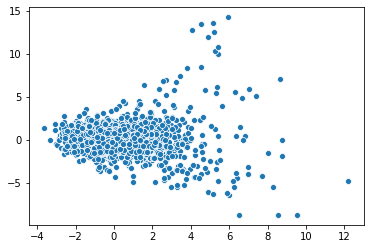

In [42]:
import seaborn as sns

sns.scatterplot(x=Xr_pca[:,0], y=Xr_pca[:,1])

In [43]:
import re
text_data = [
    f'{row.originalTitle}|{row.genre}|{row.production_region}|'
    f'{row.runtimeMinutes}|{row.writers}|{row.directors}|'
    f'{row.year}|{row.originalTitleLang}|'
    for index, row in df.iterrows()
]

In [44]:
single_genres = [entry[0] if len(entry) == 1 else "MultiGenre" for entry in df.genre.str.split(',')]
single_genres_colors = ['blue' if i == 'MultiGenre' else 'red' for i in single_genres]

In [45]:
n_genre = [len(entry) for entry in df.genre]

In [46]:
from sklearn.preprocessing import OrdinalEncoder

lang_enc = OrdinalEncoder().fit_transform(df.originalTitleLang.values.reshape(-1,1)).ravel()

In [47]:
english_other = ['red' if lang == "en" else "blue" for lang in df.originalTitleLang]

In [48]:
import plotly.graph_objects as go
import plotly.express as px


fig = go.Figure(data=go.Scatter(x=Xr_pca[:, 0],
                                y=Xr_pca[:, 1],
                                mode='markers',
                                marker_color=n_genre,
                                text=text_data))


fig.show()

In [49]:
from umap import UMAP

In [ ]:
umap = UMAP(n_components=2)

Xr_umap = umap.fit_transform(Xcomb)

In [27]:
import plotly.graph_objects as go
import plotly.express as px


fig = go.Figure(data=go.Scatter(x=Xr_umap[:, 0],
                                y=Xr_umap[:, 1],
                                mode='markers',
                                marker_color=n_genre,
                                text=text_data))


fig.show()

In [28]:
umap = UMAP(n_components=3)

Xr3_umap = umap.fit_transform(Xcomb)

In [29]:
fig = go.Figure(data=go.Scatter3d(
    x=Xr3_umap[:, 0],
    y=Xr3_umap[:, 1],
    z=Xr3_umap[:, 2],
    mode='markers',
    marker_color=n_genre,
    text=text_data))


fig.show()

In [ ]:
df.groupby('writers').describe().max()

In [ ]:
from umap import UMAP
import plotly.graph_objects as go


aggr_bert = 1 * mean_bert +  0.1 *  max_bert + 0.6 * min_bert
aggr_fasttext = 1 * mean_embeddings + 0.6 * min_embeddings + 0.1 * max_embeddings

aggr_comb = np.hstack([aggr_bert, aggr_fasttext])

umap = UMAP(n_components=2)

aggr_umap = umap.fit_transform(aggr_comb)

fig = go.Figure(data=go.Scatter(x=aggr_umap[:, 0],
                                y=aggr_umap[:, 1],
                                mode='markers',
                                text=text_data))


fig.show()

In [ ]:
import seaborn as sns 
sns.scatterplot(x=test_umap[:,0], y=test_umap[:,1])

In [39]:
from sklearn.mixture import BayesianGaussianMixture

clu = BayesianGaussianMixture(n_components=40)
clu = clu.fit(test)
probs = clu.predict_proba(mean_bert)
probs

NameError: name 'test' is not defined

In [ ]:
labels = clu.fit_predict(test)

In [ ]:
np.unique(probs)

In [30]:
from sklearn.model_selection import ParameterGrid, train_test_split
from functools import partial
from tqdm.notebook import tqdm
from sklearn.mixture import GaussianMixture

param_grid = ParameterGrid({
    'mean_weight': np.linspace(0.1, 1,4),
    'max_weight': np.linspace(0.1, 1,4),
    'min_weight': np.linspace(0.1, 1,4)
})

Xmean_train, Xmean_test = train_test_split(mean_bert, test_size=0.2)
Xmax_train, Xmax_test = train_test_split(max_bert, test_size=0.2)
Xmin_train, Xmin_test = train_test_split(min_bert, test_size=0.2)

results = []
for params in tqdm(param_grid):
    X_train = Xmean_train * params ['mean_weight'] + Xmax_train * params ['max_weight'] + Xmin_train * params ['min_weight']
    X_test = Xmean_test * params ['mean_weight'] + Xmax_test * params ['max_weight'] + Xmin_test * params ['min_weight']
    
    gm = GaussianMixture(n_components=7)
    gm.fit(X_train)
    bic = gm.bic(X_test)
    aic = gm.aic(X_test)
    score = gm.score(X_test)
    print(params, '=>', bic, aic)
    results.append({'params': params, 'bic': bic, 'aic': aic, 'score': score})

results_df = pd.DataFrame.from_records(results)

{'max_weight': 0.1, 'mean_weight': 0.1, 'min_weight': 0.1} => 48220998.01197156 39033933.58501388
{'max_weight': 0.1, 'mean_weight': 0.1, 'min_weight': 0.4} => 179247191.33978236 170060126.91282466
{'max_weight': 0.1, 'mean_weight': 0.1, 'min_weight': 0.7} => 37654072.05702412 28467007.63006644
{'max_weight': 0.1, 'mean_weight': 0.1, 'min_weight': 1.0} => 16374442.377223399 7187377.950265715
{'max_weight': 0.1, 'mean_weight': 0.4, 'min_weight': 0.1} => 23020890.072807256 13833825.645849572
{'max_weight': 0.1, 'mean_weight': 0.4, 'min_weight': 0.4} => 235714186.89750078 226527122.4705431
{'max_weight': 0.1, 'mean_weight': 0.4, 'min_weight': 0.7} => 38151771.98613145 28964707.559173767
{'max_weight': 0.1, 'mean_weight': 0.4, 'min_weight': 1.0} => 663037375.8926944 653850311.4657366
{'max_weight': 0.1, 'mean_weight': 0.7, 'min_weight': 0.1} => 14366819.356052022 5179754.929094338
{'max_weight': 0.1, 'mean_weight': 0.7, 'min_weight': 0.4} => 21989131.4402119 12802067.013254218
{'max_weight

In [36]:
results_df.sort_values(by=['aic'], ascending=True)

,params,bic,aic,score
8,"{'max_weight': 0.1, 'mean_weight': 0.7, 'min_w...",1.436682e+07,5.179755e+06,-8.318705e+02
36,"{'max_weight': 0.7, 'mean_weight': 0.4, 'min_w...",1.553557e+07,6.348507e+06,-1.771382e+03
12,"{'max_weight': 0.1, 'mean_weight': 1.0, 'min_w...",1.562022e+07,6.433152e+06,-1.839424e+03
28,"{'max_weight': 0.4, 'mean_weight': 1.0, 'min_w...",1.580942e+07,6.622353e+06,-1.991515e+03
3,"{'max_weight': 0.1, 'mean_weight': 0.1, 'min_w...",1.637444e+07,7.187378e+06,-2.445715e+03
...,...,...,...,...
55,"{'max_weight': 1.0, 'mean_weight': 0.4, 'min_w...",2.545969e+09,2.536782e+09,-2.035882e+06
43,"{'max_weight': 0.7, 'mean_weight': 0.7, 'min_w...",2.726213e+09,2.717026e+09,-2.180772e+06
39,"{'max_weight': 0.7, 'mean_weight': 0.4, 'min_w...",2.813652e+09,2.804464e+09,-2.251061e+06
58,"{'max_weight': 1.0, 'mean_weight': 0.7, 'min_w...",3.124505e+09,3.115318e+09,-2.500943e+06


In [38]:
results_df.iloc[36].params

{'max_weight': 0.7, 'mean_weight': 0.4, 'min_weight': 0.1}